In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from src.config import PROCESSED_DATA_DIR

scaled_train_path: Path = PROCESSED_DATA_DIR / "scaled" / "trainset.csv"
scaled_test_path: Path = PROCESSED_DATA_DIR / "scaled" /"testset.csv"
unscaled_train_path: Path = PROCESSED_DATA_DIR / "unscaled" / "trainset.csv"
unscaled_test_path: Path = PROCESSED_DATA_DIR / "unscaled" /"testset.csv"

df = pd.read_csv(str(unscaled_test_path), index_col='id')
df.head()

2024-10-22 16:40:45.773 | INFO     | src.config:<module>:14 - PROJ_ROOT path is: G:\Work\DS\dont-bet-on-sports


,tm_spread,opp_spread,total,temperature,humidity_pct,wind_speed,week,tm_first_downs,tm_fourth_down_att,tm_fourth_down_conv,...,opp_location_N,tm_location_H,tm_location_N,week_day_Fri,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
id,,,,,,,,,,,,,,,,,,,,,
201910200nyg,-3.5,3.5,49.5,56.0,78.0,3.0,7,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
201910200gnb,-5.5,5.5,48.0,55.0,74.0,6.0,7,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
201910200oti,-3.0,3.0,42.5,77.0,40.0,2.0,7,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
201910200chi,-4.0,4.0,37.0,54.0,84.0,6.0,7,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
201910200sea,-3.0,3.0,49.0,50.0,79.0,8.0,7,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0


### Random Forest Regression

In [2]:
from src.modeling.predict import predict_random_forests

rfr_results = predict_random_forests(df.drop(columns=['r_spread']))

In [3]:
from sklearn.metrics import mean_absolute_error as mae 

rfr_mae = mae(df['r_spread'], rfr_results)
print(rfr_mae)

9.960714715811323


2024-10-22 17:16:12.881 | INFO     | src.config:<module>:14 - PROJ_ROOT path is: G:\Work\DS\dont-bet-on-sports
2024-10-22 17:16:14.781 | INFO     | src.reports:analyze_random_forests:30 - Random Forests MAE: 9.960714715811323


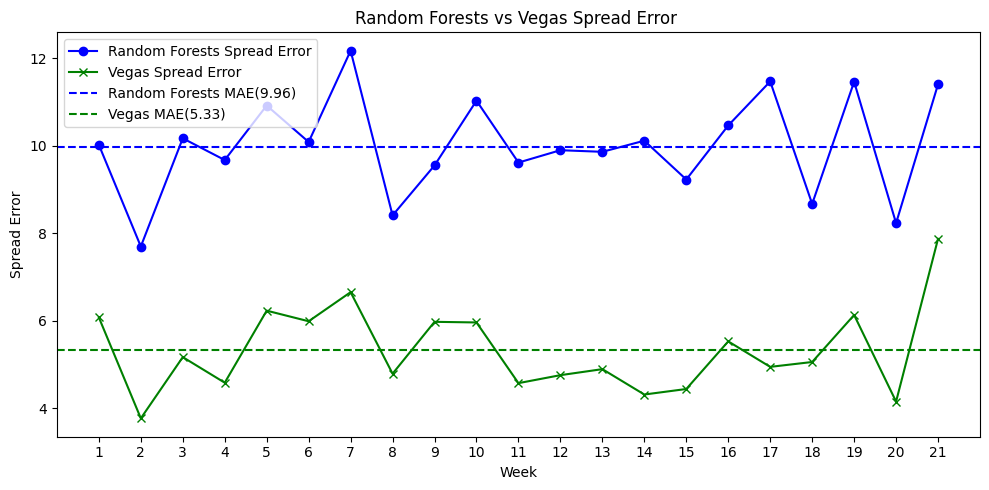

Total Wagered: 13090
Total PnL: 140


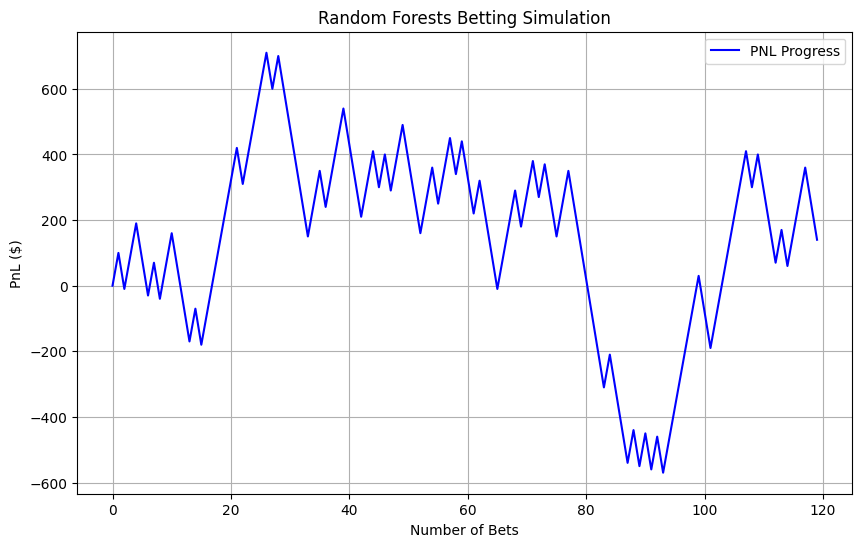

In [1]:
from src.reports import analyze_random_forests

df_pred = analyze_random_forests()

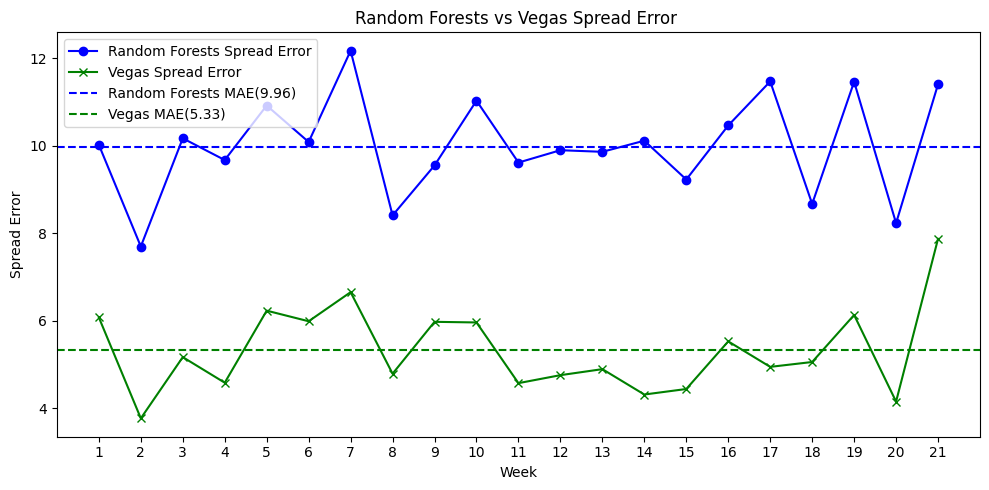

In [3]:
from src.reports import plot_error
df_model = df.assign(pred = rfr_results)
plot_error(df_model, 'Random Forests', False)



### Support Vector Regression

In [5]:
from src.modeling.predict import predict_support_vectors

svr_results = predict_support_vectors(df.drop(columns=['r_spread']))

In [6]:
svr_mae = mae(df['r_spread'], svr_results)
print(svr_mae)

0.7289848070851574


2024-10-22 17:16:27.905 | INFO     | src.reports:analyze_support_vectors:46 - Support Vectors MAE: 10.348215073552813


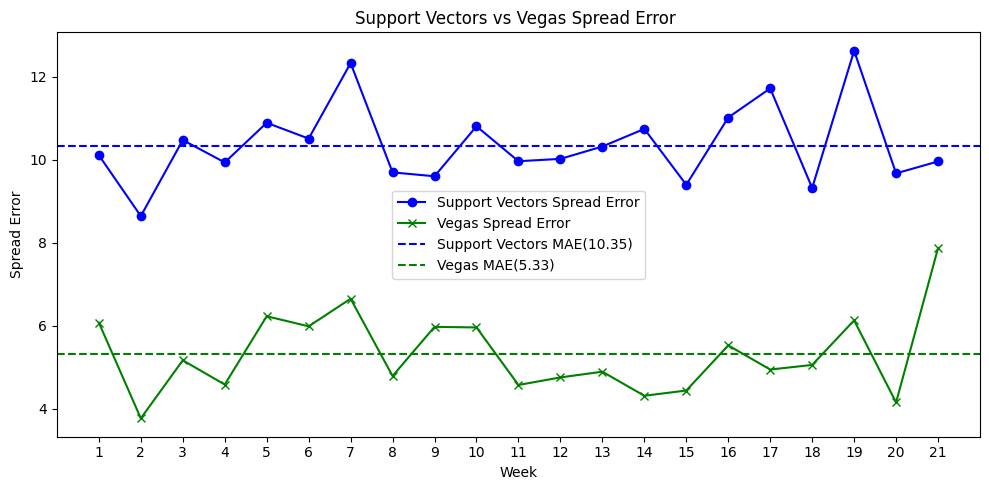

Total Wagered: 10670
Total PnL: 460


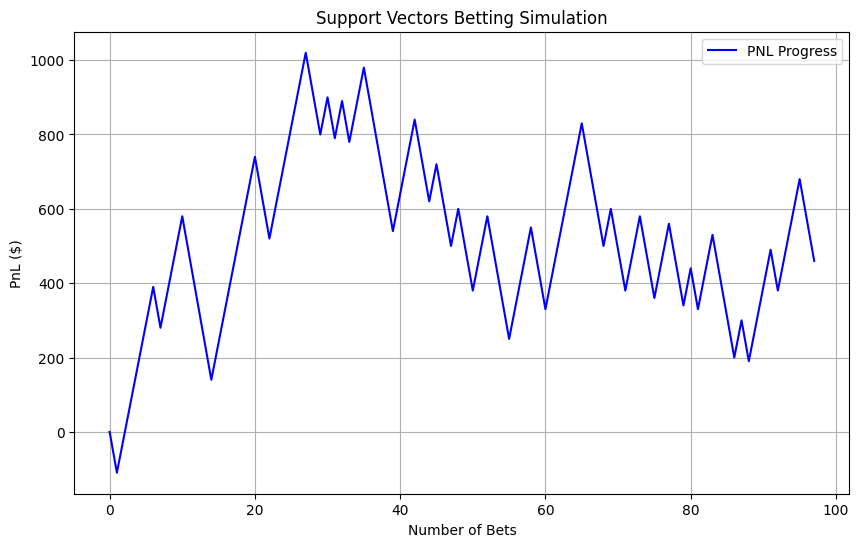

In [2]:
from src.reports import analyze_support_vectors

analyze_support_vectors()

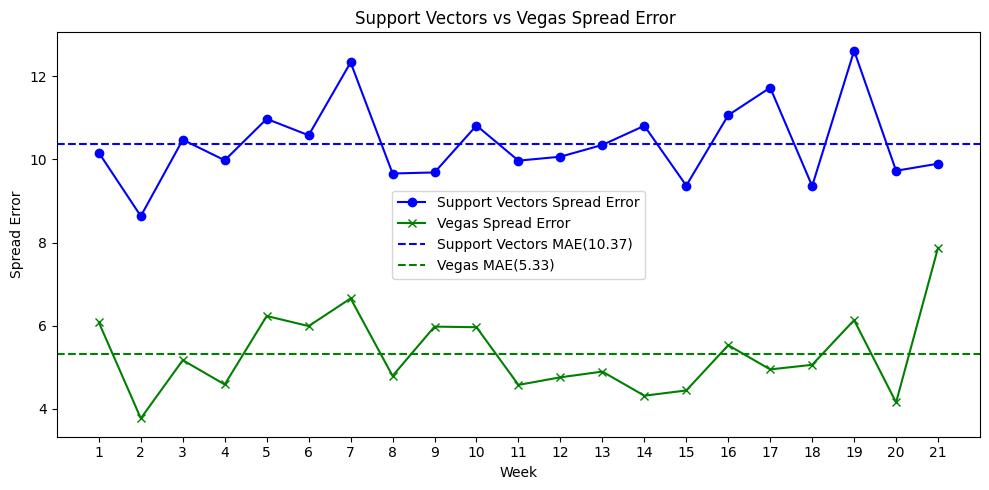

In [7]:
from src.reports import plot_error
df_model = df.assign(pred = svr_results)
plot_error(df_model, 'Support Vectors')

### Gradient Boosted Trees

In [8]:
from src.modeling.predict import predict_gbt

gbt_results = predict_gbt(df.drop(columns=['r_spread']))
gbt_mae = mae(df['r_spread'], gbt_results)
print(gbt_mae)

11.360737704552704


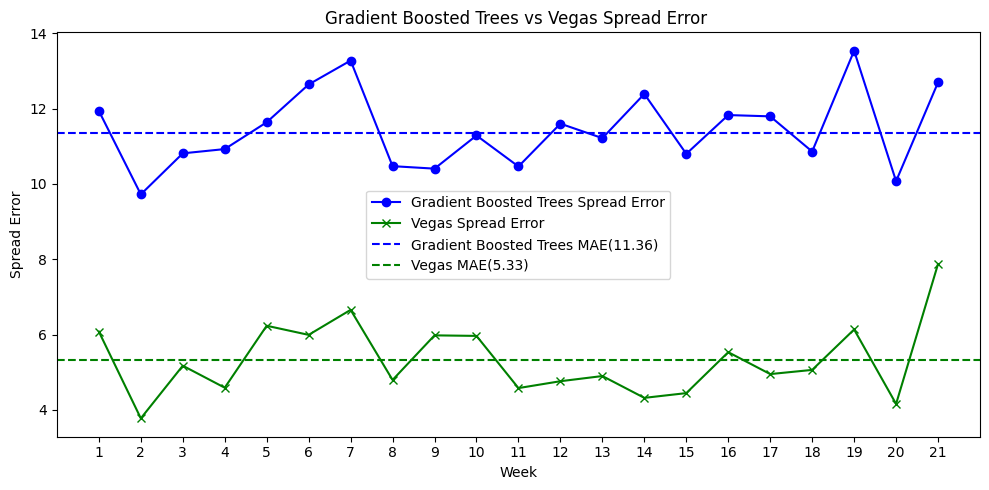

In [9]:
df_model = df.assign(pred = gbt_results)
plot_error(df_model, 'Gradient Boosted Trees')

2024-10-22 19:52:13.849 | INFO     | src.config:<module>:14 - PROJ_ROOT path is: G:\Work\DS\dont-bet-on-sports
2024-10-22 19:52:24.135 | INFO     | src.reports:analyze_random_forests:36 - Random Forests MAE: 9.960840099416156
2024-10-22 19:52:24.195 | INFO     | src.reports:plot_sim:183 - Total Games: 1289
2024-10-22 19:52:24.196 | INFO     | src.reports:plot_sim:184 - Total Bets: 119
2024-10-22 19:52:24.196 | INFO     | src.reports:plot_sim:185 - Total Wagered: 13090
2024-10-22 19:52:24.197 | INFO     | src.reports:plot_sim:186 - Total PnL: -70
2024-10-22 19:52:24.197 | INFO     | src.reports:plot_sim:187 - Bets Won: 62
2024-10-22 19:52:24.198 | INFO     | src.reports:plot_sim:188 - Win Rate: 52.10084033613446
2024-10-22 19:52:24.198 | INFO     | src.reports:plot_sim:189 - Return on Investment (ROI): -0.53475935828877


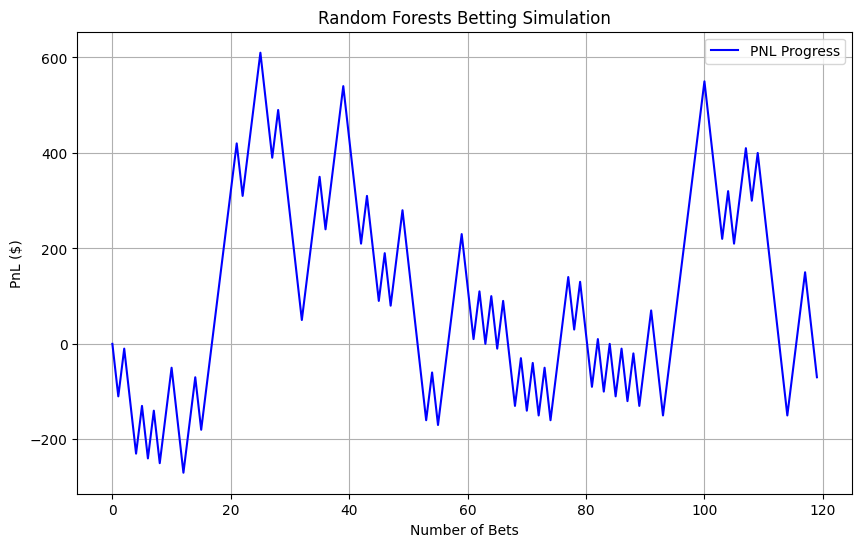

2024-10-22 19:52:25.503 | INFO     | src.reports:analyze_support_vectors:49 - Support Vector Machines MAE: 10.353470698135727
2024-10-22 19:52:25.558 | INFO     | src.reports:plot_sim:183 - Total Games: 1289
2024-10-22 19:52:25.565 | INFO     | src.reports:plot_sim:184 - Total Bets: 91
2024-10-22 19:52:25.565 | INFO     | src.reports:plot_sim:185 - Total Wagered: 10010
2024-10-22 19:52:25.565 | INFO     | src.reports:plot_sim:186 - Total PnL: -1820
2024-10-22 19:52:25.565 | INFO     | src.reports:plot_sim:187 - Bets Won: 39
2024-10-22 19:52:25.565 | INFO     | src.reports:plot_sim:188 - Win Rate: 42.857142857142854
2024-10-22 19:52:25.565 | INFO     | src.reports:plot_sim:189 - Return on Investment (ROI): -18.181818181818183


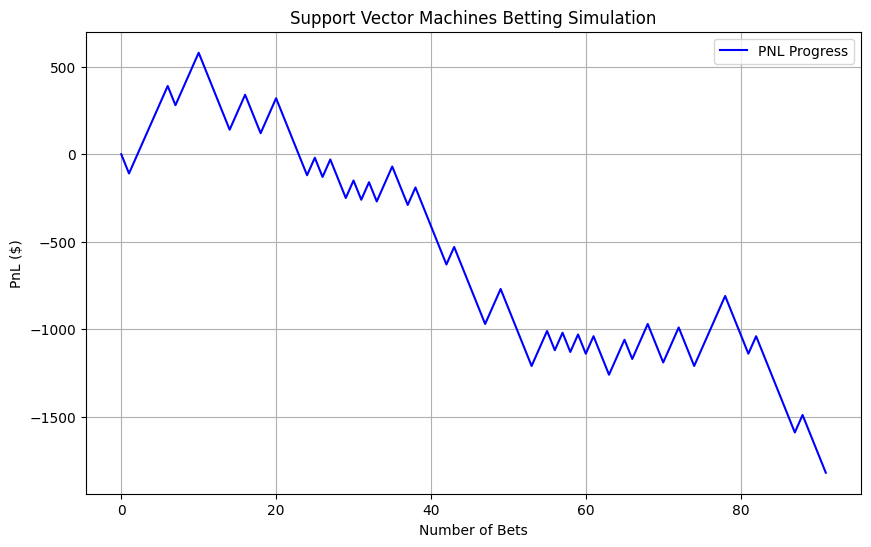

2024-10-22 19:52:26.190 | INFO     | src.reports:analyze_gradient_boosted_trees:62 - Gradient Boosted Trees MAE: 10.137287542731498
2024-10-22 19:52:26.272 | INFO     | src.reports:plot_sim:183 - Total Games: 1289
2024-10-22 19:52:26.273 | INFO     | src.reports:plot_sim:184 - Total Bets: 146
2024-10-22 19:52:26.275 | INFO     | src.reports:plot_sim:185 - Total Wagered: 16060
2024-10-22 19:52:26.275 | INFO     | src.reports:plot_sim:186 - Total PnL: -4720
2024-10-22 19:52:26.276 | INFO     | src.reports:plot_sim:187 - Bets Won: 54
2024-10-22 19:52:26.277 | INFO     | src.reports:plot_sim:188 - Win Rate: 36.986301369863014
2024-10-22 19:52:26.277 | INFO     | src.reports:plot_sim:189 - Return on Investment (ROI): -29.389788293897883


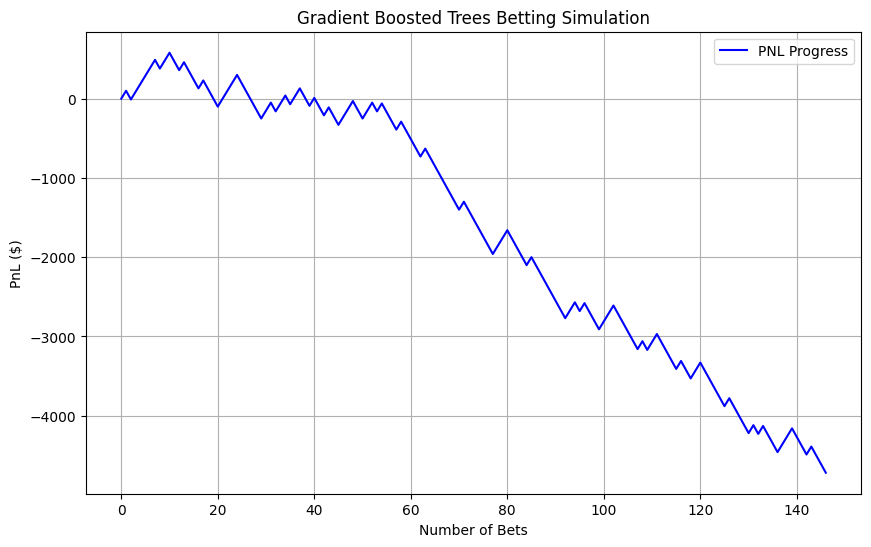

2024-10-22 19:52:27.752 | INFO     | src.reports:analyze_nn:75 - Neural Network MAE: 11.479833545002068
2024-10-22 19:52:27.815 | INFO     | src.reports:plot_sim:183 - Total Games: 1289
2024-10-22 19:52:27.815 | INFO     | src.reports:plot_sim:184 - Total Bets: 364
2024-10-22 19:52:27.815 | INFO     | src.reports:plot_sim:185 - Total Wagered: 40040
2024-10-22 19:52:27.815 | INFO     | src.reports:plot_sim:186 - Total PnL: -7490
2024-10-22 19:52:27.815 | INFO     | src.reports:plot_sim:187 - Bets Won: 155
2024-10-22 19:52:27.815 | INFO     | src.reports:plot_sim:188 - Win Rate: 42.582417582417584
2024-10-22 19:52:27.822 | INFO     | src.reports:plot_sim:189 - Return on Investment (ROI): -18.706293706293707


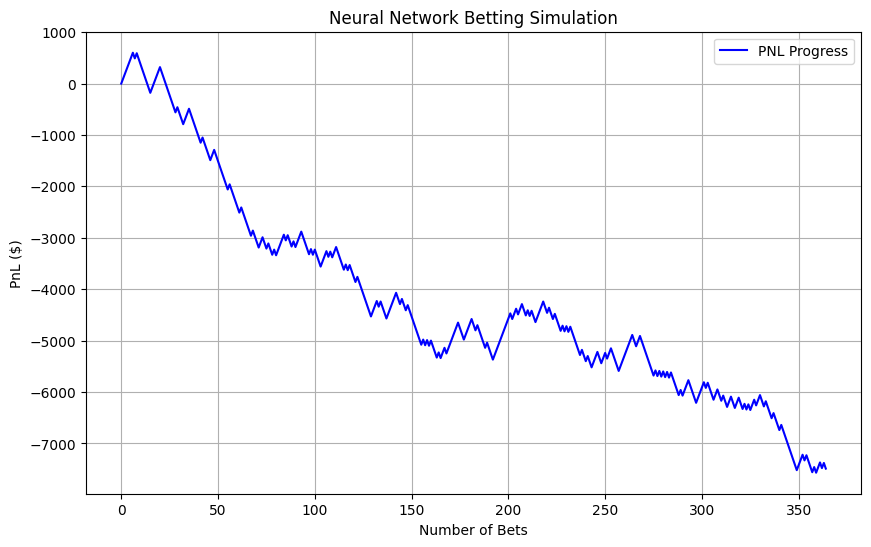

In [1]:
from src.reports import analyze_gradient_boosted_trees, analyze_nn, analyze_random_forests, analyze_support_vectors

analyze_random_forests()
analyze_support_vectors()
analyze_gradient_boosted_trees()
analyze_nn()